In [1]:
# load libraries
import pandas as pd
import os
import numpy as np
import datetime
# from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from torch import save

In [2]:
# mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# change me, have to point to the Meteotrentino drive folder
wk =  "/content/drive/My Drive/10. Meteotrentino/"

# folder for the csv
subfolder = "CSVs/"

# select the filename, make me dynamic
selected_dataset = "temperature.csv"

In [2]:
# data_path = wk+subfolder+selected_dataset
data_path = "../../temperatura1_A.csv"

In [13]:
df_row_data = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int} # Daniele: added the validation code so we can train on validated data (no need of classes, just distinguish between good and bad data)
  ) 

# define a header 
df_row_data = df_row_data.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False
)
df_row_data['datetime'] = pd.to_datetime(df_row_data['date']+" "+df_row_data['time'], format = '%d/%m/%Y %H:%M')
df_row_data

,label,date,time,value,validation_code,datetime
0,T0009,01/01/2014,00:00,-2.1,1,2014-01-01 00:00:00
1,T0009,01/01/2014,00:15,-2.3,1,2014-01-01 00:15:00
2,T0009,01/01/2014,00:30,-2.2,1,2014-01-01 00:30:00
3,T0009,01/01/2014,00:45,-2.3,1,2014-01-01 00:45:00
4,T0009,01/01/2014,01:00,-2.5,1,2014-01-01 01:00:00
...,...,...,...,...,...,...
11763686,T0227,31/12/2021,22:45,8.1,1,2021-12-31 22:45:00
11763687,T0227,31/12/2021,23:00,8.2,1,2021-12-31 23:00:00
11763688,T0227,31/12/2021,23:15,8.1,1,2021-12-31 23:15:00
11763689,T0227,31/12/2021,23:30,8.0,1,2021-12-31 23:30:00


In [14]:
df_single_station = df_row_data[df_row_data['label'] == 'T0010']
print(np.unique(df_single_station['validation_code'].values))
print(np.unique(df_row_data['label'].values))

array(['T0009', 'T0010', 'T0014', 'T0015', 'T0024', 'T0027', 'T0030',
       'T0032', 'T0059', 'T0065', 'T0071', 'T0074', 'T0082', 'T0088',
       'T0092', 'T0094', 'T0096', 'T0101', 'T0103', 'T0104', 'T0118',
       'T0129', 'T0135', 'T0139', 'T0146', 'T0147', 'T0148', 'T0151',
       'T0153', 'T0167', 'T0169', 'T0175', 'T0177', 'T0179', 'T0182',
       'T0189', 'T0193', 'T0200', 'T0210', 'T0212', 'T0226', 'T0227'],
      dtype=object)

In [15]:
from importlib import reload  # Python 3.4+
import TSF.data_splitter
TSF.data_splitter = reload(TSF.data_splitter)
from TSF.data_splitter import *
# new_data = split_df_for_TSF(df_single_station.iloc[0:10], 24, 1, ".")

PERIOD = 24
PREDICTION = 1
df = df_single_station
df_train,df_test = split_df_for_TSF(df, 24, 1)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
print(df_train)
print(df_test)

      sensor_code         in_datetime    0    1    2    3    4    5    6    7  \
0           T0010 2014-01-01 00:15:00 -2.7 -2.7 -3.0 -3.0 -2.7 -2.9 -3.0 -3.0   
1           T0010 2014-01-01 04:15:00 -3.1 -3.1 -3.5 -3.3 -3.6 -3.3 -3.5 -3.4   
2           T0010 2014-01-01 08:15:00 -3.7 -3.8 -3.9 -3.7 -3.4 -3.3 -3.3 -3.4   
3           T0010 2014-01-01 12:15:00  0.8  1.5  1.7  2.1  2.2  3.8  3.8  3.5   
4           T0010 2014-01-01 16:15:00  1.4  1.1  0.5  0.1 -0.2 -0.4 -0.5 -0.6   
...           ...                 ...  ...  ...  ...  ...  ...  ...  ...  ...   
16887       T0010 2021-12-30 06:15:00  1.8  1.3  1.6  1.3  1.3  0.7  1.0  1.0   
16888       T0010 2021-12-30 10:15:00  1.9  3.5  2.9  4.0  4.2  5.2  4.1  5.1   
16889       T0010 2021-12-30 14:15:00  7.9  8.3  8.3  8.6  8.7  7.9  7.1  6.6   
16890       T0010 2021-12-30 18:15:00  4.7  4.5  4.5  4.1  4.0  4.0  3.7  4.1   
16891       T0010 2021-12-30 22:15:00  2.9  3.3  3.3  3.4  2.8  3.1  3.1  2.9   

       ...    86   87   88 

In [17]:
np.unique(df_test[['val_0','val_1','val_2','val_3']].values, return_counts=True)

(array([  1., 140.,  nan]), array([67538,     1,    29]))

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self, df_train, df_test, transform = None, target_transform = None):
    self.features = torch.FloatTensor(df_train.drop(['sensor_code','in_datetime'],axis=1).values)
    ### standardize the data
    means = self.features.mean(dim=1, keepdim=True)
    stds = self.features.std(dim=1, keepdim=True)
    self.features = (self.features - means) / stds
    # mean, std= torch.mean(self.features,0), torch.std(self.features,0)
    # self.features = (self.features-mean)/std
    # self.features = torch.nn.functional.normalize(self.features, p=1 ,dim=1)

    self.sensor_code = df_train['sensor_code'].values
    self.in_datetime = df_train['in_datetime'].values
    ### this is very bad! the 4 is hard_coded!
    self.target = torch.FloatTensor(df_test.drop(['sensor_code','in_datetime']+[f"val_{idx}" for idx in range(4)],axis=1).values)
    self.target = (self.target - means) / stds

    self.labels = torch.FloatTensor(df_test[[f"val_{idx}" for idx in range(4)]].values)
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.sensor_code)

  def __getitem__(self, idx):
    sensor_code = self.sensor_code[idx]
    date = self.in_datetime[idx]
    features = self.features[idx]
    labels = self.labels[idx]
    target = self.target[idx]
    return {"sensor_code": sensor_code, "date":date,"features": features, "target":target,"labels":labels}

In [29]:
splits = ['train','test']
shuffle = {'train':True,'test':False}
dataset = {}

training_features = df_train.sample(frac=0.8).reset_index(drop=True)
training_target = df_test.iloc[training_features.index.values]
test_features = df_train.drop(training_features.index)
test_target = df_test.iloc[test_features.index]

dataset['train'] = CustomDataset(training_features, training_target)
dataset['test'] = CustomDataset(test_features, test_target)
from torch import save
# save(dataset['train'], 'train.pt')
# save(dataset['test'], 'test.pt')

# b_size = {'train':64,'test':len(dataset['test'])}
b_size = {'train':len(dataset['train']),'test':len(dataset['test'])}

dataloader = {x: torch.utils.data.DataLoader(dataset=dataset[x],
                                            batch_size=b_size[x],
                                            shuffle=shuffle[x],
                                            collate_fn=lambda x: x,
                                            drop_last=True)
                                            #num_workers=int(opt.workers),
                                            #worker_init_fn=(None if opt.manualseed == -1
                                            #else lambda x: np.random.seed(opt.manualseed)))
            for x in splits}



In [20]:
from collections.abc import Sequence
from torch import nn
class Model(nn.Module):
    def __init__(self, input_size, output_size, batch_size, hidden_dim):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim

        # Defining the layers
        # RNN Layer
        self.lstm1 = nn.LSTMCell(input_size, hidden_dim)
        # self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        #Initializing hidden state for first input using method defined below
        self.hidden,self.cell = self.init_hidden_and_cell(batch_size)

    def forward(self, x, future_preds=0):
        outputs, batch_size = [], x.size(0)

        #Initializing hidden state for first input using method defined below
        hidden,cell = self.init_hidden_and_cell(batch_size)
        # hidden,cell = self.hidden, self.cell
        
        # x = torch.unsqueeze(x, 2)
        for time_step in x.split(1, dim=1):
            hidden,cell = self.lstm1(time_step, (hidden,cell))
            output = self.fc(hidden) # output from the last FC layer
            outputs.append(output)
        
        for i in range(future_preds):
            # this only generates future predictions if we pass in future_preds>0
            # mirrors the code above, using last output/prediction as input
            hidden,cell = self.lstm1(time_step, (hidden,cell))
            output = self.fc(hidden) # output from the last FC layer
            outputs.append(output)

        # transform list to tensor    
        outputs = torch.cat(outputs, dim=1)
        return outputs
    
    def init_hidden_and_cell(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        hidden = torch.zeros(batch_size, self.hidden_dim).to(torch.device("cpu"))
        cell = torch.zeros(batch_size, self.hidden_dim).to(torch.device("cpu"))
         # We'll send the tensor holding the hidden state to the device we specified earlier as well
        return hidden,cell

device = torch.device("cpu")
sequence_length = 96
pred_length = 4
# Instantiate the model with hyperparameters
model = Model(input_size=1, output_size=1, batch_size=64, hidden_dim=24)
# We'll also set the model to the device that we defined earlier (default is CPU)
model = model.to(device)

# Define hyperparameters
lr = 0.0005

# Define Loss, Optimizer
criterion = nn.MSELoss()#CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

from tqdm import tqdm
n_epochs = 30
for epoch in range(1, n_epochs + 1):
    for data in tqdm(dataloader['train'], leave=True, total=len(dataloader['train'])):
        batch_input_features = torch.stack([v["features"] for v in data])
        # target_features = torch.stack([v["target"] for v in data])
        output = model(batch_input_features)
        output = output.to(device)
        loss = criterion(output, batch_input_features)
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
    if loss.item() < 0.02:
        break
    print("Loss: {:.4f}".format(loss.item()))


100%|██████████| 211/211 [00:04<00:00, 44.31it/s]


Loss: 0.1193


100%|██████████| 211/211 [00:04<00:00, 45.59it/s]


Loss: 0.0783


100%|██████████| 211/211 [00:04<00:00, 45.34it/s]


Loss: 0.0336


100%|██████████| 211/211 [00:04<00:00, 43.13it/s]


Loss: 0.0541


100%|██████████| 211/211 [00:04<00:00, 44.44it/s]


Loss: 0.0784


100%|██████████| 211/211 [00:04<00:00, 44.44it/s]


Loss: 0.0395


100%|██████████| 211/211 [00:04<00:00, 45.50it/s]


Loss: 0.0408


100%|██████████| 211/211 [00:04<00:00, 45.05it/s]


Loss: 0.0736


100%|██████████| 211/211 [00:04<00:00, 46.28it/s]


Loss: 0.0267


100%|██████████| 211/211 [00:04<00:00, 43.83it/s]


Loss: 0.0478


100%|██████████| 211/211 [00:04<00:00, 44.26it/s]


Loss: 0.0395


100%|██████████| 211/211 [00:04<00:00, 45.47it/s]


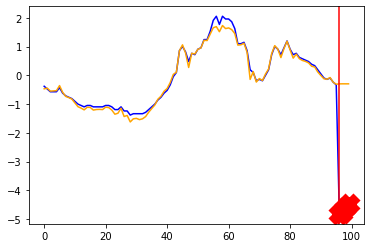

In [37]:
import matplotlib.pyplot as plt
which = 8937
# sample = next(iter(dataloader['train']))
sample_tensor_features = torch.stack([v["features"] for v in sample])
sample_tensor_target = torch.stack([v["target"] for v in sample])
sample_tensor_validation = torch.stack([v["labels"] for v in sample])
# sample_validation = sample['val_label']
model.eval()
with torch.no_grad():
    reconstructed = model(sample_tensor_features, future_preds=4)
y_outliers = np.where(sample_tensor_validation[which] == 140, np.NaN, sample_tensor_target[which])
plt.plot(torch.cat((sample_tensor_features, sample_tensor_target), 1)[which],color='blue')
plt.plot(reconstructed[which],color="orange")
plt.plot(np.arange(96,100), y_outliers, "x-",ms=15,mew=10,color="red")
plt.axvline(x=96, color='red')

In [34]:
sample = next(iter(dataloader['train']))
print(np.unique(torch.stack([v["labels"] for v in sample]).numpy(),return_index=True))

(array([  1., 140.,  nan], dtype=float32), array([   0, 8937, 3663]))
